 Apply Lasso regression to select relevant features.

In [1]:
import pandas as pd

# Load the data from the provided CSV file
data_path = '/content/final.csv'
life_expectancy_data = pd.read_csv(data_path)

# Display the first few rows of the dataset and its basic info
life_expectancy_data.head(), life_expectancy_data.info(), life_expectancy_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9928 entries, 0 to 9927
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  9928 non-null   object 
 1   Year                                     9928 non-null   int64  
 2   Gender                                   9928 non-null   object 
 3   Life expectancy                          9928 non-null   float64
 4   Unemployment                             9928 non-null   float64
 5   Infant Mortality                         9928 non-null   float64
 6   GDP                                      9928 non-null   float64
 7   GNI                                      9928 non-null   float64
 8   Clean fuels and cooking technologies     9928 non-null   float64
 9   Per Capita                               9928 non-null   float64
 10  Mortality caused by road traffic injury  9928 no

(       Country  Year  Gender  Life expectancy  Unemployment  Infant Mortality  \
 0  Afghanistan  2000  Female           57.120        13.846              85.0   
 1  Afghanistan  2001  Female           57.596        13.849              82.7   
 2  Afghanistan  2002  Female           58.080        14.355              80.4   
 3  Afghanistan  2003  Female           58.578        14.222              77.8   
 4  Afghanistan  2004  Female           59.093        14.047              75.3   
 
             GDP           GNI  Clean fuels and cooking technologies  \
 0  1.368449e+10  1.824044e+10                                   6.4   
 1  1.368449e+10  1.824044e+10                                   7.2   
 2  4.055180e+09  1.824044e+10                                   8.2   
 3  4.515559e+09  1.824044e+10                                   9.4   
 4  5.226779e+09  1.824044e+10                                  10.4   
 
    Per Capita  ...  DPT Immunization  HepB3 Immunization  \
 0  434.739

Encoding country and Gender to numeical and features like GDP, Unemployment, and Infant Mortality have been scaled to have a mean of zero and a standard deviation of one

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Creating an instance of LabelEncoder and StandardScaler
label_encoder = LabelEncoder()
scaler = StandardScaler()

  # Encoding categorical features
life_expectancy_data['Country'] = label_encoder.fit_transform(life_expectancy_data['Country'])
life_expectancy_data['Gender'] = label_encoder.fit_transform(life_expectancy_data['Gender'])

# Separating features and target variable
features = life_expectancy_data.drop('Life expectancy', axis=1)
target = life_expectancy_data['Life expectancy']

 # Standardizing numerical features
scaled_features = scaler.fit_transform(features)

# Convert scaled features back to DataFrame for better manipulation and understanding
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Display the first few rows of scaled features to verify changes
scaled_features_df.head()


,Country,Year,Gender,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,Mortality caused by road traffic injury,...,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Non-communicable Mortality,Sucide Rate
0,-1.716696,-1.648134,-1.0,0.908136,2.151070,-0.278547,-0.278979,-1.466177,-0.629113,-0.429232,...,-4.341670,-0.878865,-4.069307,-1.176152,-1.664382,0.560754,-1.492366,1.492366,2.034406,-0.525689
1,-1.716696,-1.474562,-1.0,0.908624,2.060731,-0.278547,-0.278979,-1.444533,-0.629113,-0.380583,...,-3.708212,-0.878865,-3.365941,-1.136748,-1.664027,0.492984,-1.488310,1.488310,2.116721,-0.525689
2,-1.716696,-1.300989,-1.0,0.990831,1.970391,-0.279875,-0.278979,-1.417478,-0.642242,-0.404908,...,-3.497059,-0.878865,-3.506614,-1.136748,-1.616941,0.696294,-1.484209,1.484209,2.163758,-0.543756
3,-1.716696,-1.127417,-1.0,0.969223,1.868268,-0.279811,-0.278979,-1.385013,-0.641663,-0.392746,...,-3.145138,-0.878865,-3.225268,-1.136748,-1.569843,0.628524,-1.480108,1.480108,2.116721,-0.543756
4,-1.716696,-0.953845,-1.0,0.940792,1.770073,-0.279713,-0.278979,-1.357958,-0.640598,-0.368421,...,-2.511680,-0.878865,-2.592238,-1.136748,-1.522507,0.831834,-1.473556,1.473556,2.128480,-0.543756


feature selection using Lasso Regression. Lasso Regression is useful for feature selection because it applies a penalty to the coefficients of the regression model, which can shrink less important features' coefficients to zero

In [3]:
from sklearn.linear_model import Lasso

# Choose an alpha value that you consider somewhat okay
desired_alpha = 0.1

# Set up the Lasso model with the chosen alpha
lasso = Lasso(alpha=desired_alpha, random_state=1)

# Fit the Lasso model to the data
lasso.fit(scaled_features_df, target)

# Display the coefficients of the model
lasso_coefficients = lasso.coef_

lasso_coefficients



array([-4.27857337e-03,  1.56497731e-01, -1.25948638e+00, -5.95134449e-02,
       -4.00498201e+00,  0.00000000e+00,  1.01208661e-01, -2.08316626e-02,
        1.28765103e+00, -8.40657158e-01, -1.06312967e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -3.79729851e-02,  2.15825135e+00,
        2.43399608e-01,  1.35077850e-01, -1.84363224e-15, -1.02422603e+00,
       -5.64042012e-01])

Features with zero coefficients are not considered important by the model and can be dropped.
Features with non-zero coefficients are deemed important and contribute to predicting life expectancy.

In [4]:
import pandas as pd

# Define a threshold for non-zero coefficients
threshold = 1e-3  # Adjust this threshold as needed

# Create a DataFrame to view non-zero coefficients and their corresponding feature names
non_zero_coefficients = pd.DataFrame({
    'Feature': scaled_features_df.columns,
    'Coefficient': lasso_coefficients
})

# Filter out features with coefficients close to zero
important_features_lasso = non_zero_coefficients[abs(non_zero_coefficients['Coefficient']) > threshold]

# Display the selected features and their coefficients
important_features_lasso


,Feature,Coefficient
0,Country,-0.004279
1,Year,0.156498
2,Gender,-1.259486
3,Unemployment,-0.059513
4,Infant Mortality,-4.004982
6,GNI,0.101209
7,Clean fuels and cooking technologies,-0.020832
8,Per Capita,1.287651
9,Mortality caused by road traffic injury,-0.840657
10,Tuberculosis Incidence,-1.063130


In [5]:
# Count the number of non-zero coefficients
num_selected_features = len(important_features_lasso)

num_selected_features


16

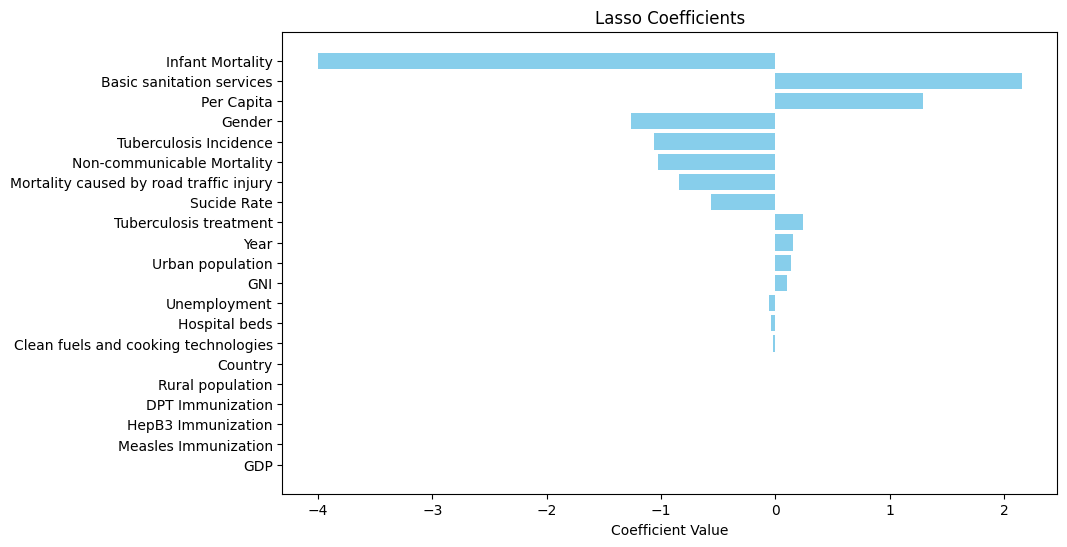

In [6]:
import matplotlib.pyplot as plt

# Create a DataFrame from the Lasso coefficients for easier handling
lasso_coefficients_df = pd.DataFrame({
    'Feature': scaled_features_df.columns,
    'Coefficient': lasso_coefficients
})

# Sort the DataFrame by the absolute values of the coefficients in descending order
lasso_coefficients_df = lasso_coefficients_df.reindex(lasso_coefficients_df.Coefficient.abs().sort_values(ascending=False).index)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(lasso_coefficients_df['Feature'], lasso_coefficients_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Lasso Coefficients')
plt.gca().invert_yaxis()  # Invert y axis to have the largest bar on top
plt.show()


We'll start by applying PCA without reducing the number of components to see the variance explained by each component.This will transform the data into principal components.: This helps in deciding how many components we should keep to retain most of the information.

In [7]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()

# Fit PCA to the scaled features
pca.fit(scaled_features_df)

# Get the explained variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance to see how many components are needed to explain the data well
cumulative_explained_variance = explained_variance_ratio.cumsum()

explained_variance_ratio, cumulative_explained_variance


(array([3.28813626e-01, 9.96753042e-02, 9.37099839e-02, 8.22783065e-02,
        5.95933669e-02, 5.05697963e-02, 4.67543508e-02, 4.28422025e-02,
        3.85137017e-02, 3.36813720e-02, 2.73676890e-02, 2.05452689e-02,
        1.83388150e-02, 1.69683497e-02, 1.36995342e-02, 1.21595320e-02,
        6.38458649e-03, 5.01080764e-03, 3.07705846e-03, 1.63475927e-05,
        8.14930132e-33]),
 array([0.32881363, 0.42848893, 0.52219891, 0.60447722, 0.66407059,
        0.71464038, 0.76139473, 0.80423694, 0.84275064, 0.87643201,
        0.9037997 , 0.92434497, 0.94268378, 0.95965213, 0.97335167,
        0.9855112 , 0.99189579, 0.99690659, 0.99998365, 1.        ,
        1.        ]))

In [8]:
# Choose a number of components - example, components that explain 85% of variance
n_components = next(i for i, total in enumerate(cumulative_explained_variance) if total > 0.85)
pca = PCA(n_components=n_components)
reduced_features = pca.fit_transform(scaled_features_df)
# Show the shape of the reduced features to confirm reduction
print("Reduced features shape:", reduced_features.shape)
# Get the loadings of each original feature on the principal components
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(n_components)], index=scaled_features_df.columns)

# Sort features based on the absolute loadings in the first principal component
sorted_features = loadings['PC1'].abs().sort_values(ascending=False)

# Display the sorted features
print("Sorted features based on PC1 loadings:")
print(sorted_features)

Reduced features shape: (9928, 9)
Sorted features based on PC1 loadings:
Infant Mortality                           0.345876
Basic sanitation services                  0.344964
Clean fuels and cooking technologies       0.337954
Measles Immunization                       0.295864
DPT Immunization                           0.293383
Urban population                           0.292521
Rural population                           0.292521
Mortality caused by road traffic injury    0.247202
Tuberculosis Incidence                     0.218619
Per Capita                                 0.216664
HepB3 Immunization                         0.211046
Hospital beds                              0.204421
Non-communicable Mortality                 0.198236
Year                                       0.072523
GNI                                        0.072463
GDP                                        0.071507
Tuberculosis treatment                     0.056611
Unemployment                               

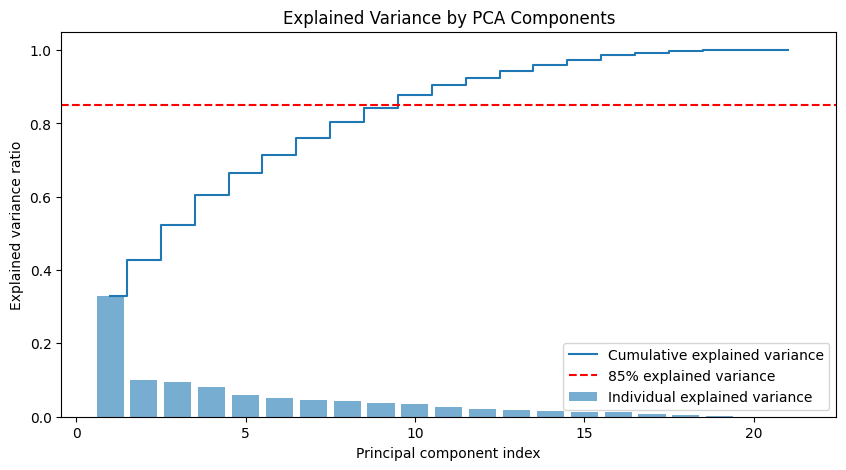

In [9]:
# Plotting the explained variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6, label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Explained Variance by PCA Components')
plt.axhline(y=0.85, color='r', linestyle='--', label='85% explained variance')  # Adjusted for 85%
plt.legend(loc='best')
plt.show()

For the SGDRegressor implemented in scikit-learn, which uses stochastic gradient descent (SGD) for training, the mathematical formulation primarily involves iteratively updating the model weights to minimize a loss function. Let's delve into the details for the commonly used squared error loss, which is typical for regression problems.

Loss Function
The basic loss function for linear regression is the mean squared error (MSE), which measures the average of the squares of the errors—that is, the average squared difference between the observed actual outcomes and the outcomes predicted by the model. The formula for MSE is:

MSE
=
1
�
∑
�
=
1
�
(
�
�
−
�
^
�
)
2
MSE=
n
1
​
  
i=1
∑
n
​
 (y
i
​
 −
y
^
​
  
i
​
 )
2

Where:

�
n is the number of samples,
�
�
y
i
​
  is the actual value of the target,
�
^
�
y
^
​
  
i
​
  is the predicted value of the target.
Model Prediction
For a linear model, the prediction
�
^
y
^
​
  is given by:

�
^
=
�
�
+
�
y
^
​
 =Xw+b
Where:

�
X is the matrix of input features,
�
w represents the weights, and
�
b is the bias.
Gradient Descent Update Rule
The weights are updated using the gradient of the loss function with respect to the weights. For the squared error loss, the gradient with respect to the weights
�
w is:

∇
�
MSE
=
−
2
�
�
�
(
�
−
�
�
)
∇
w
​
 MSE=−
n
2
​
 X
T
 (y−Xw)
The update rule in gradient descent is then:

�
:
=
�
−
�
∇
�
MSE
w:=w−η∇
w
​
 MSE
Where
�
η is the learning rate, a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

Learning Rate Strategies
In the SGDRegressor, the learning rate can be specified using different strategies:

Constant:
�
�
=
�
0
η
t
​
 =η
0
​

Optimal (default for SGDRegressor):
�
�
=
�
0
�
η
t
​
 =
t
η
0
​

​
  where
�
t is the iteration number.
Invscaling:
�
�
=
�
0
�
�
�
�
�
�
_
�
η
t
​
 =
t
power_t

η
0
​

​
  where power_t is a parameter.
Adaptive: If the training loss does not decrease by at least tol for one epoch, the learning rate is reduced by a factor.
Regularization
Regularization can also be added to the loss function to control overfitting, which adds a penalty term to the basic MSE. The most common forms are L1 and L2 regularization:

L1 Regularization (Lasso): Adds an absolute value penalty
�
∑
∣
�
∣
α∑∣w∣.
L2 Regularization (Ridge): Adds a squared penalty
�
∑
�
2
α∑w
2
 .

Training and evaluating Lasso-selected features:
Epoch 1/10 - RMSE: 2.7931
Epoch 2/10 - RMSE: 2.7656
Epoch 3/10 - RMSE: 2.7604
Epoch 4/10 - RMSE: 2.7588
Epoch 5/10 - RMSE: 2.7581
Epoch 6/10 - RMSE: 2.7577
Epoch 7/10 - RMSE: 2.7575
Epoch 8/10 - RMSE: 2.7574
Epoch 9/10 - RMSE: 2.7573
Epoch 10/10 - RMSE: 2.7572

Training and evaluating PCA-reduced features:
Epoch 1/10 - RMSE: 3.3311
Epoch 2/10 - RMSE: 3.3307
Epoch 3/10 - RMSE: 3.3306
Epoch 4/10 - RMSE: 3.3305
Epoch 5/10 - RMSE: 3.3304
Epoch 6/10 - RMSE: 3.3303
Epoch 7/10 - RMSE: 3.3303
Epoch 8/10 - RMSE: 3.3302
Epoch 9/10 - RMSE: 3.3302
Epoch 10/10 - RMSE: 3.3301


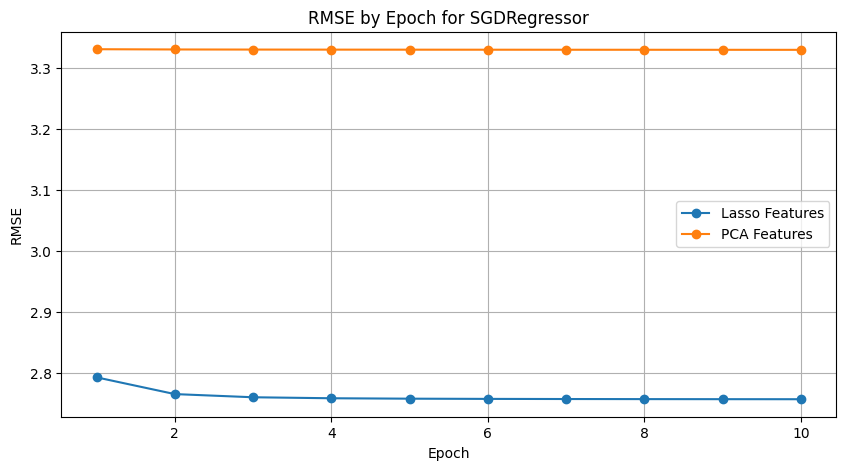

In [10]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Configure the SGDRegressor with corrected loss parameter
sgd_model_lasso = SGDRegressor(loss='squared_error', alpha=0, max_iter=10, tol=1e-3, eta0=0.01, random_state=1)
sgd_model_pca = SGDRegressor(loss='squared_error', alpha=0, max_iter=10, tol=1e-3, eta0=0.01, random_state=1)

# Define epochs
epochs = 10

# Prepare data
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(
    scaled_features_df[important_features_lasso['Feature']], target, test_size=0.2, random_state=1)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    reduced_features, target, test_size=0.2, random_state=1)

# Lists to store RMSE for each epoch
rmse_lasso_list = []
rmse_pca_list = []

# Train and evaluate on Lasso-selected features
print("Training and evaluating Lasso-selected features:")
for epoch in range(epochs):
    sgd_model_lasso.partial_fit(X_train_lasso, y_train_lasso)
    predictions_lasso = sgd_model_lasso.predict(X_test_lasso)
    rmse_lasso = np.sqrt(mean_squared_error(y_test_lasso, predictions_lasso))
    rmse_lasso_list.append(rmse_lasso)
    print(f'Epoch {epoch + 1}/{epochs} - RMSE: {rmse_lasso:.4f}')

# Train and evaluate on PCA-reduced features
print("\nTraining and evaluating PCA-reduced features:")
for epoch in range(epochs):
    sgd_model_pca.partial_fit(X_train_pca, y_train_pca)
    predictions_pca = sgd_model_pca.predict(X_test_pca)
    rmse_pca = np.sqrt(mean_squared_error(y_test_pca, predictions_pca))
    rmse_pca_list.append(rmse_pca)
    print(f'Epoch {epoch + 1}/{epochs} - RMSE: {rmse_pca:.4f}')

# Plotting RMSE over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), rmse_lasso_list, label='Lasso Features', marker='o')
plt.plot(range(1, epochs + 1), rmse_pca_list, label='PCA Features', marker='o')
plt.title('RMSE by Epoch for SGDRegressor')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()


Training and evaluating Polynomial Regression on Lasso-selected features:
Epoch 1/10 - RMSE: 6449178011.7026
Epoch 2/10 - RMSE: 5125521480.1725
Epoch 3/10 - RMSE: 4741318319.1998
Epoch 4/10 - RMSE: 4513691044.5837
Epoch 5/10 - RMSE: 4349991792.0977
Epoch 6/10 - RMSE: 4221843655.1770
Epoch 7/10 - RMSE: 4116680721.9016
Epoch 8/10 - RMSE: 4027714728.3276
Epoch 9/10 - RMSE: 3950807213.0512
Epoch 10/10 - RMSE: 3883227884.8724

Training and evaluating Polynomial Regression on PCA-reduced features:
Epoch 1/10 - RMSE: 4635110812.1196
Epoch 2/10 - RMSE: 2819884224.1432
Epoch 3/10 - RMSE: 2343088959.4031
Epoch 4/10 - RMSE: 2111362212.7217
Epoch 5/10 - RMSE: 1967967322.5180
Epoch 6/10 - RMSE: 1867120832.7434
Epoch 7/10 - RMSE: 1790478172.5102
Epoch 8/10 - RMSE: 1729175954.1035
Epoch 9/10 - RMSE: 1678360030.3531
Epoch 10/10 - RMSE: 1635122273.9524


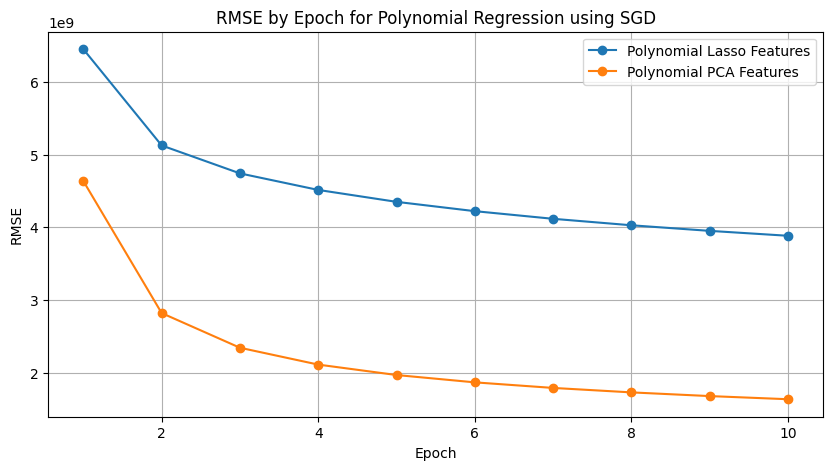

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Adjust the degree of polynomial features if necessary (degree 2 is more manageable)
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the features
X_train_lasso_poly = poly_features.fit_transform(X_train_lasso)
X_test_lasso_poly = poly_features.transform(X_test_lasso)
X_train_pca_poly = poly_features.fit_transform(X_train_pca)
X_test_pca_poly = poly_features.transform(X_test_pca)

# Reconfigure SGDRegressor with refined parameters
sgd_model_lasso = SGDRegressor(loss='squared_error', penalty='l2', alpha=0.9, max_iter=100, tol=1e-3, learning_rate='optimal', eta0=0.01, random_state=1)
sgd_model_pca = SGDRegressor(loss='squared_error', penalty='l2', alpha=0.9, max_iter=100, tol=1e-3, learning_rate='optimal', eta0=0.01, random_state=1)

# Define epochs
epochs = 10

# Initialize lists for storing RMSE
rmse_lasso_list = []
rmse_pca_list = []

# Train and evaluate on polynomial-transformed Lasso-selected features
print("Training and evaluating Polynomial Regression on Lasso-selected features:")
for epoch in range(epochs):
    sgd_model_lasso.partial_fit(X_train_lasso_poly, y_train_lasso)
    predictions_lasso = sgd_model_lasso.predict(X_test_lasso_poly)
    rmse_lasso = np.sqrt(mean_squared_error(y_test_lasso, predictions_lasso))
    rmse_lasso_list.append(rmse_lasso)
    print(f'Epoch {epoch + 1}/{epochs} - RMSE: {rmse_lasso:.4f}')

# Train and evaluate on polynomial-transformed PCA-reduced features
print("\nTraining and evaluating Polynomial Regression on PCA-reduced features:")
for epoch in range(epochs):
    sgd_model_pca.partial_fit(X_train_pca_poly, y_train_pca)
    predictions_pca = sgd_model_pca.predict(X_test_pca_poly)
    rmse_pca = np.sqrt(mean_squared_error(y_test_pca, predictions_pca))
    rmse_pca_list.append(rmse_pca)
    print(f'Epoch {epoch + 1}/{epochs} - RMSE: {rmse_pca:.4f}')

# Plotting RMSE over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), rmse_lasso_list, label='Polynomial Lasso Features', marker='o')
plt.plot(range(1, epochs + 1), rmse_pca_list, label='Polynomial PCA Features', marker='o')
plt.title('RMSE by Epoch for Polynomial Regression using SGD')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()


Optimizing Random Forest on Lasso-selected features...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Optimized Lasso RMSE: 0.6791
Optimizing Random Forest on PCA-reduced features...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Optimized PCA RMSE: 1.5699


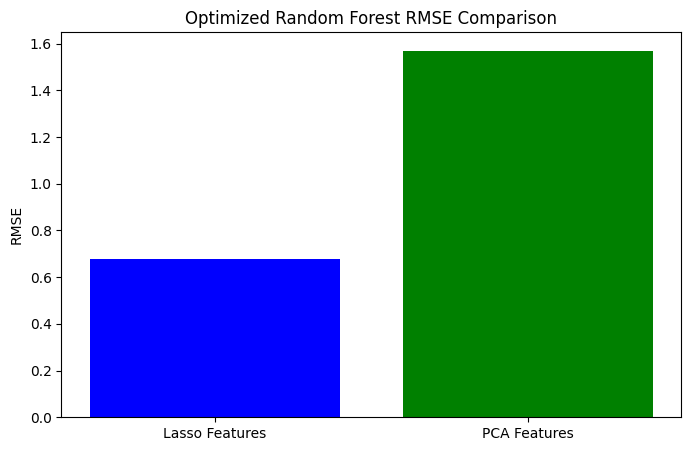

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Define the model
rf = RandomForestRegressor(random_state=1)

# Set up parameter grid to tune
param_dist = {
    'n_estimators': [10, 50, 100],  # fewer options
    'max_depth': [None, 10, 20],    # reduced depth options
    'min_samples_split': [2, 10],   # fewer split options
    'min_samples_leaf': [1, 4]      # fewer leaf options
}

# Setup the randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, random_state=1)

# Perform random search on Lasso-selected features
print("Optimizing Random Forest on Lasso-selected features...")
random_search_lasso = random_search.fit(X_train_lasso, y_train_lasso)
best_rf_lasso = random_search_lasso.best_estimator_
predictions_lasso = best_rf_lasso.predict(X_test_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test_lasso, predictions_lasso))
print(f'Optimized Lasso RMSE: {rmse_lasso:.4f}')

# Perform random search on PCA-reduced features
print("Optimizing Random Forest on PCA-reduced features...")
random_search_pca = random_search.fit(X_train_pca, y_train_pca)
best_rf_pca = random_search_pca.best_estimator_
predictions_pca = best_rf_pca.predict(X_test_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test_pca, predictions_pca))
print(f'Optimized PCA RMSE: {rmse_pca:.4f}')

# Plotting RMSE comparison
labels = ['Lasso Features', 'PCA Features']
rmse_values = [rmse_lasso, rmse_pca]

plt.figure(figsize=(8, 5))
plt.bar(labels, rmse_values, color=['blue', 'green'])
plt.title('Optimized Random Forest RMSE Comparison')
plt.ylabel('RMSE')
plt.show()
